In [46]:
import pandas as pd
from matplotlib import pyplot as plt

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']
non_fbmc_countries = ['CH', 'GB', 'ES', 'IT_NORD', 'DK_1', 'NO_2']


In [55]:
df_observed = pd.read_excel("./data/validation/day_ahead_prices.xlsx", index_col=0)
df_observed_non_fbmc = pd.read_excel("./data/validation/day_ahead_prices_non_fbmc.xlsx", index_col=0)
df_observed = df_observed.drop(columns=['ALBE', 'ALDE'])
df_observed = df_observed[0:24*56]

df_forecast = pd.read_excel("price_forecast_w_outages.xlsx")
df_forecast2 = pd.read_excel("price_forecast_alpha_fuel.xlsx")
df_forecast3 = pd.read_excel("price_forecast_wo_np.xlsx")
df_forecast4 = pd.read_excel("price_forecast_weighted.xlsx")
df_forecast5 = pd.read_excel("price_forecast_weighted_no_sd.xlsx")
df_forecast6 = pd.read_excel("price_forecast_atc.xlsx")

df_forecast.index = df_observed.index
df_forecast2.index = df_observed.index
df_forecast3.index = df_observed.index
df_forecast4.index = df_observed.index
df_forecast5.index = df_observed.index
df_forecast6.index = df_observed.index

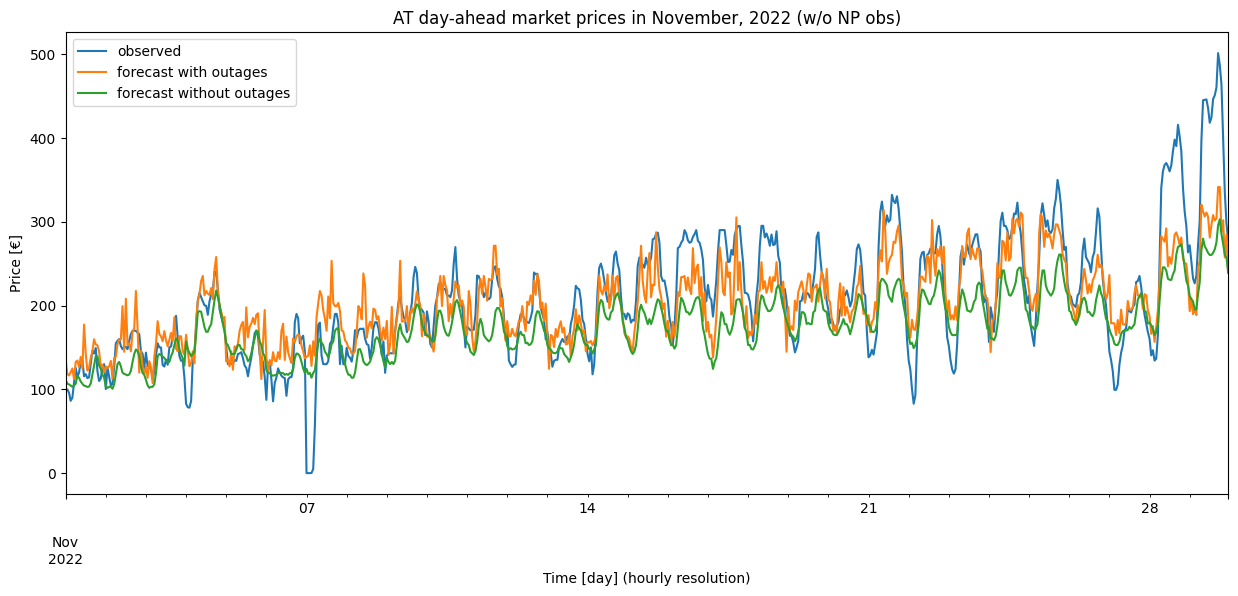

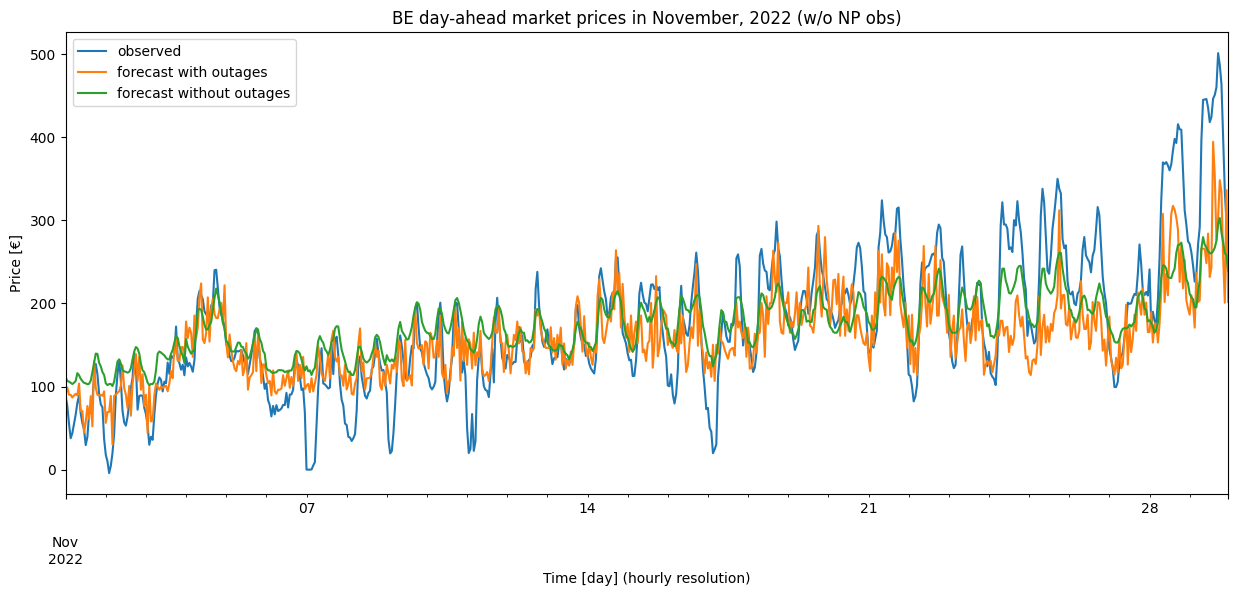

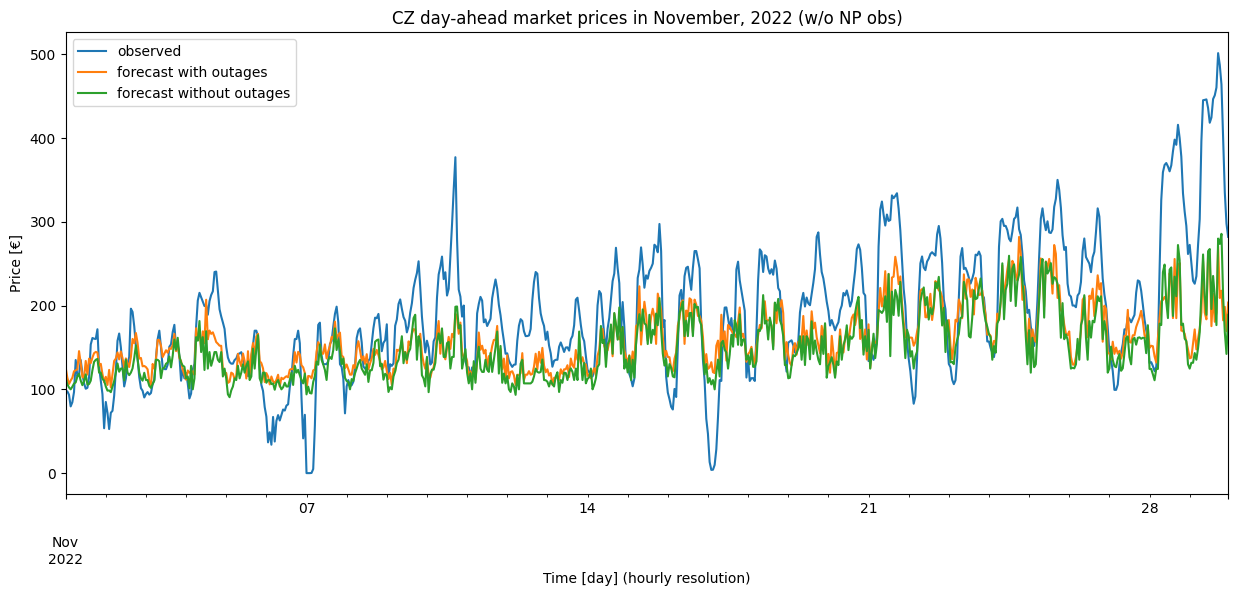

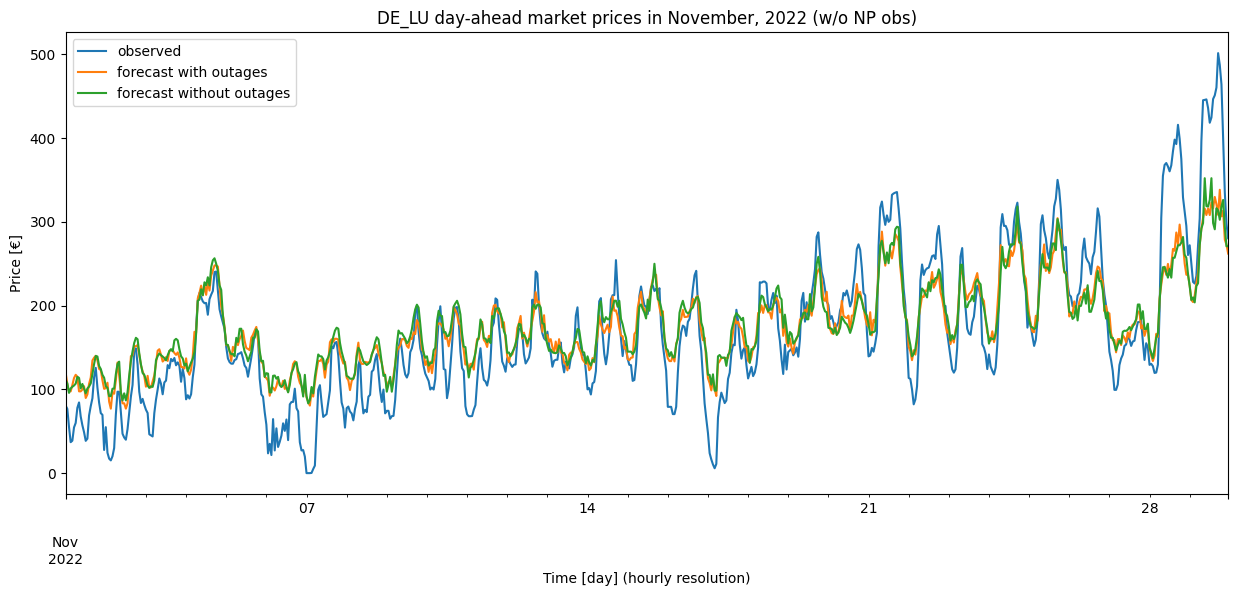

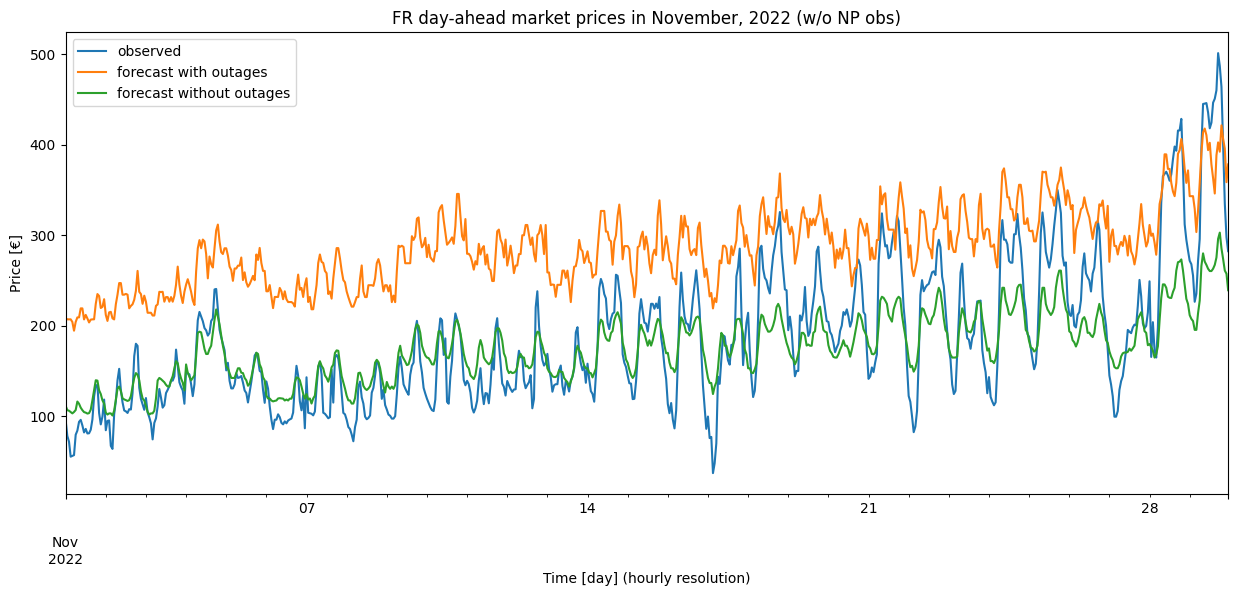

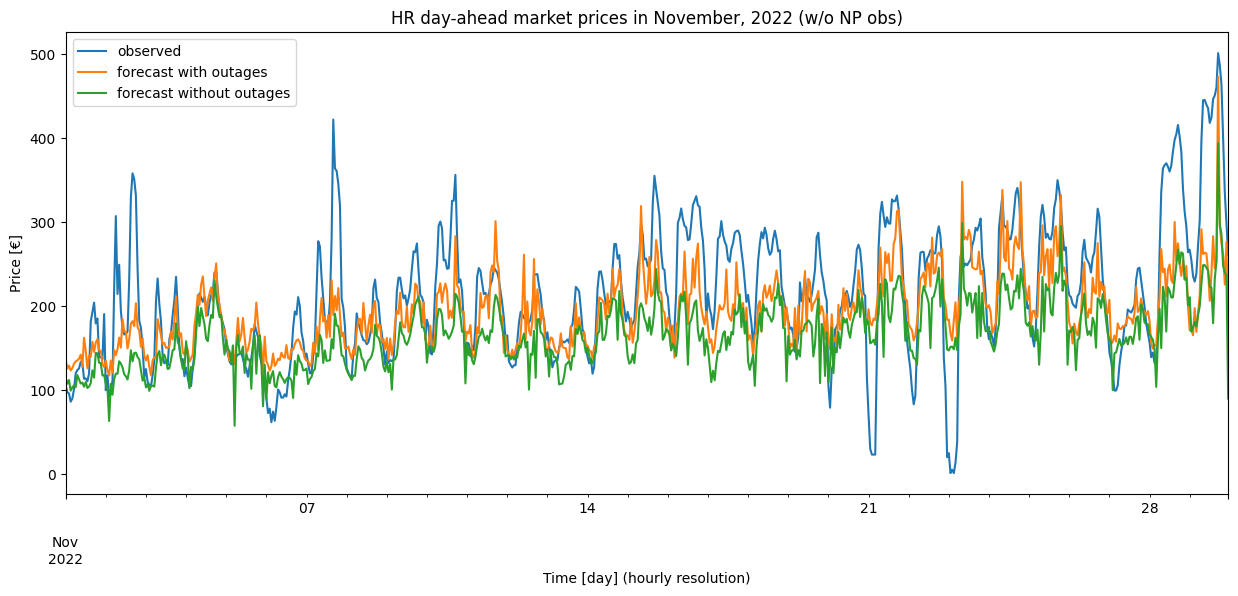

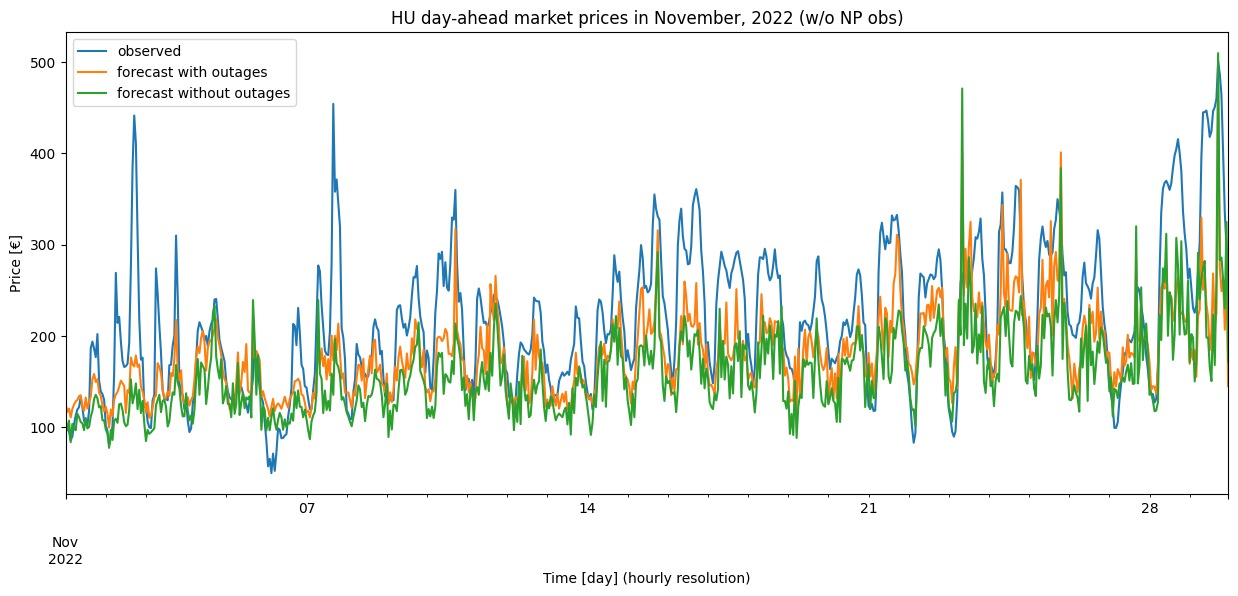

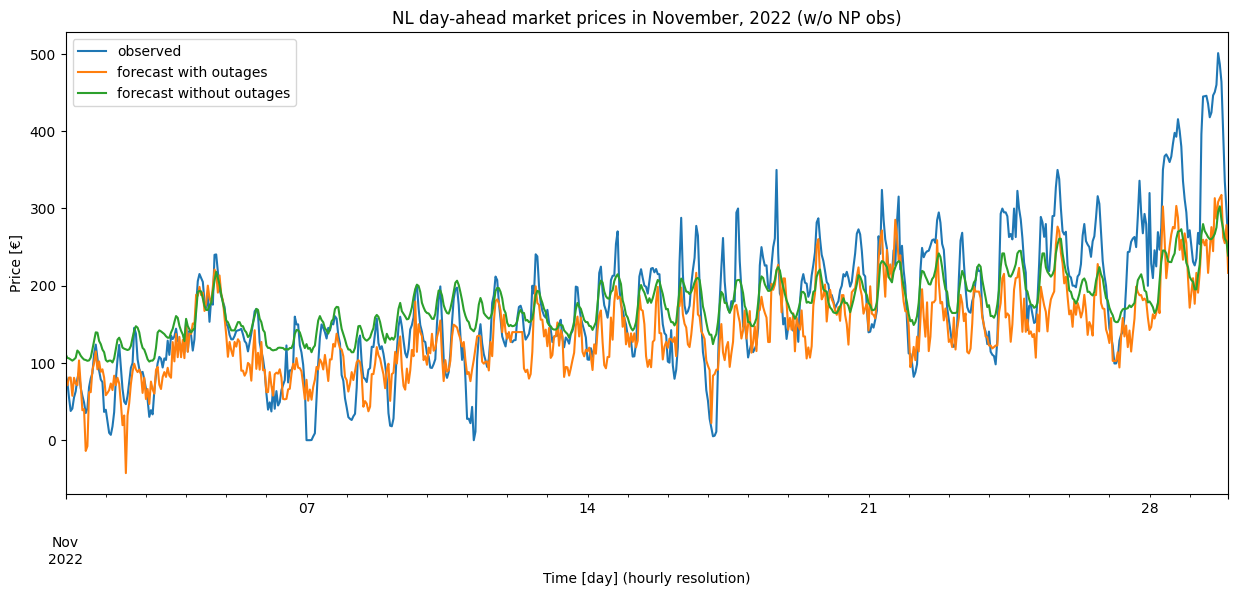

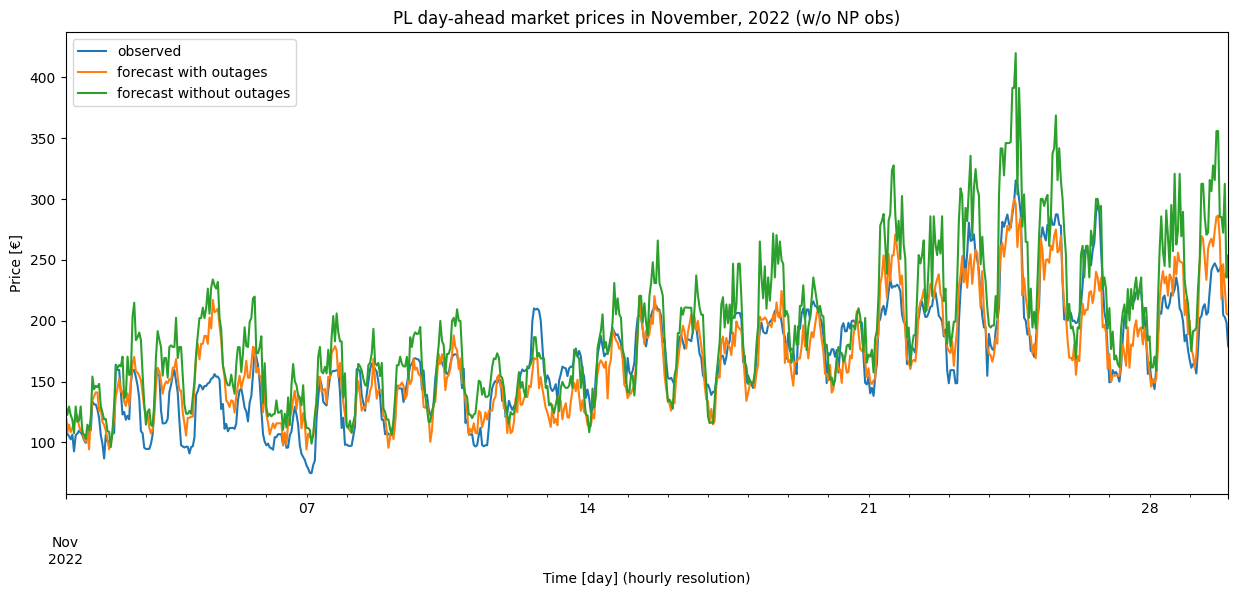

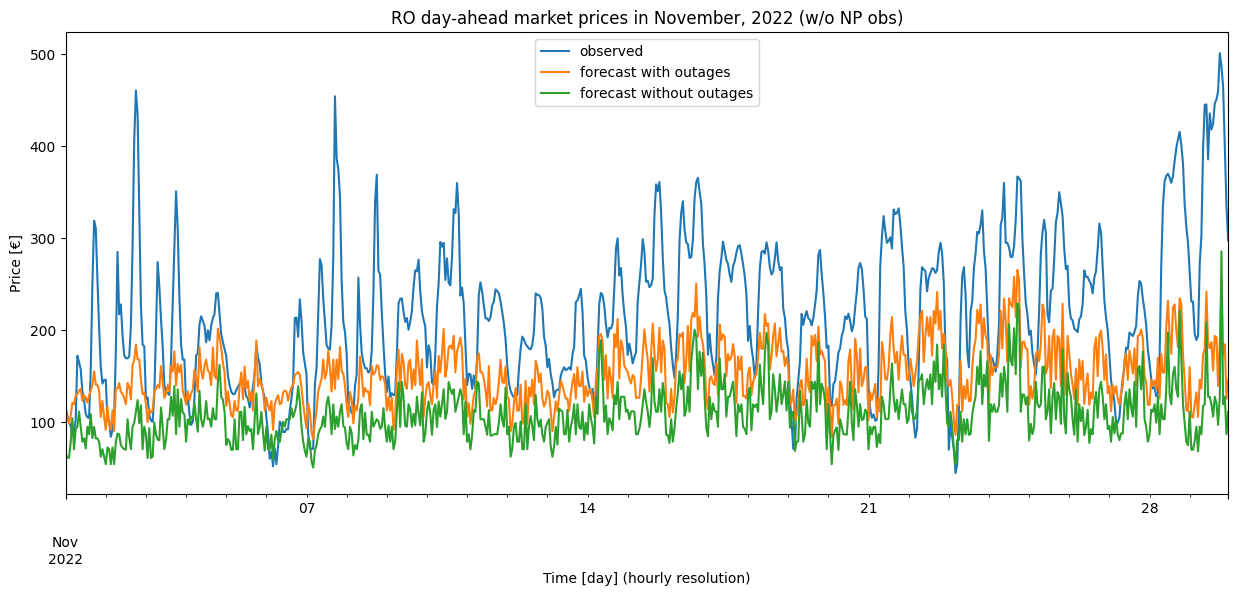

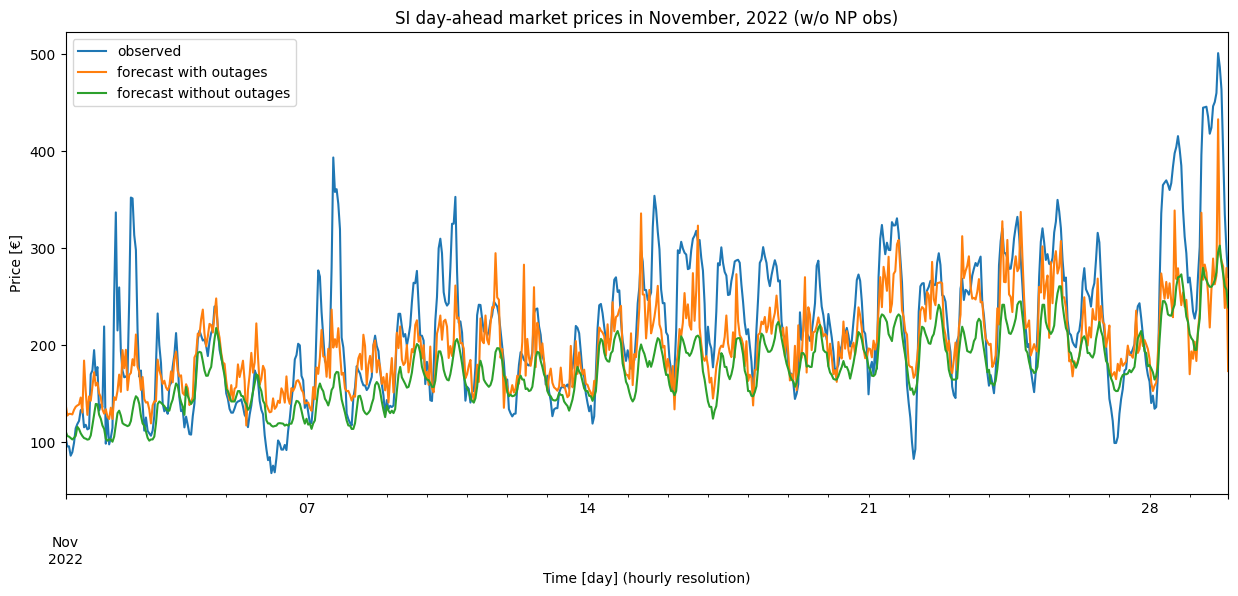

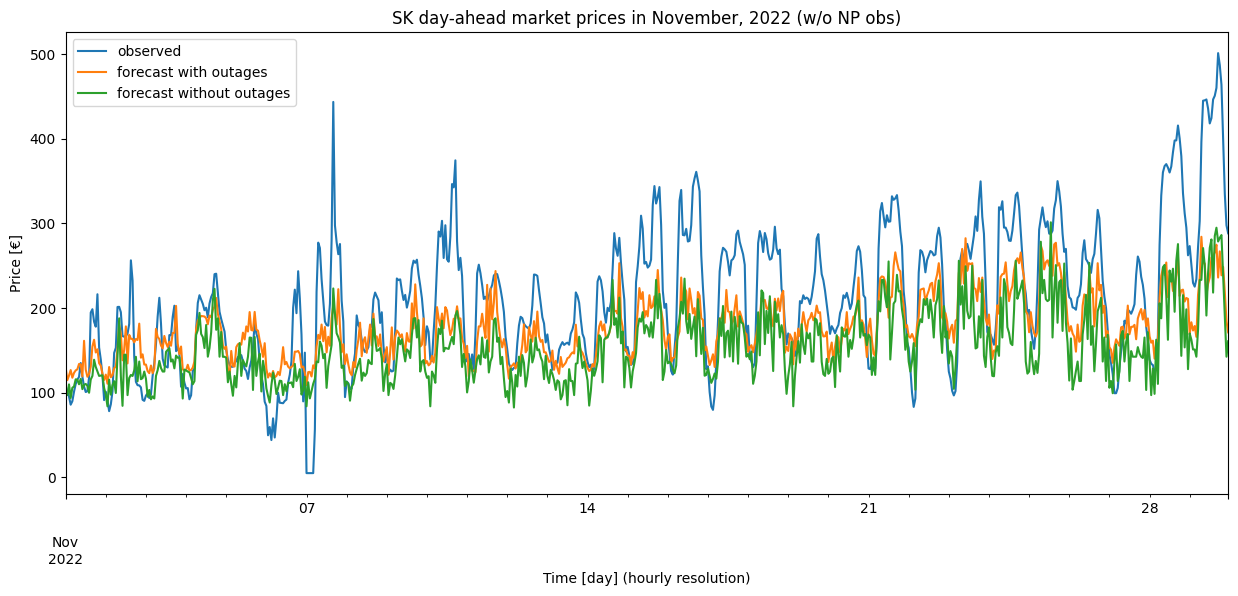

In [58]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed.iloc[0:24*29][zone].plot()
    #df_forecast.iloc[0:24*29][zone].plot(ax=ax)
    #df_forecast2.iloc[0:24*29][zone].plot(ax=ax)
    #df_forecast3.iloc[0:24*29][zone].plot(ax=ax)
    #df_forecast4.iloc[0:24*29][zone].plot(ax=ax)
    df_forecast5.iloc[0:24*29][zone].plot(ax=ax)
    df_forecast6.iloc[0:24*29][zone].plot(ax=ax)
    plt.title("{0} day-ahead market prices in November, 2022 (w/o NP obs)".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed', 'forecast with outages', 'forecast without outages', 'forecast with fuel-dep alpha', 'forecast objective weighted', 'forecast objective weighted weak duality', 'forecast with e/i'])
    plt.show()

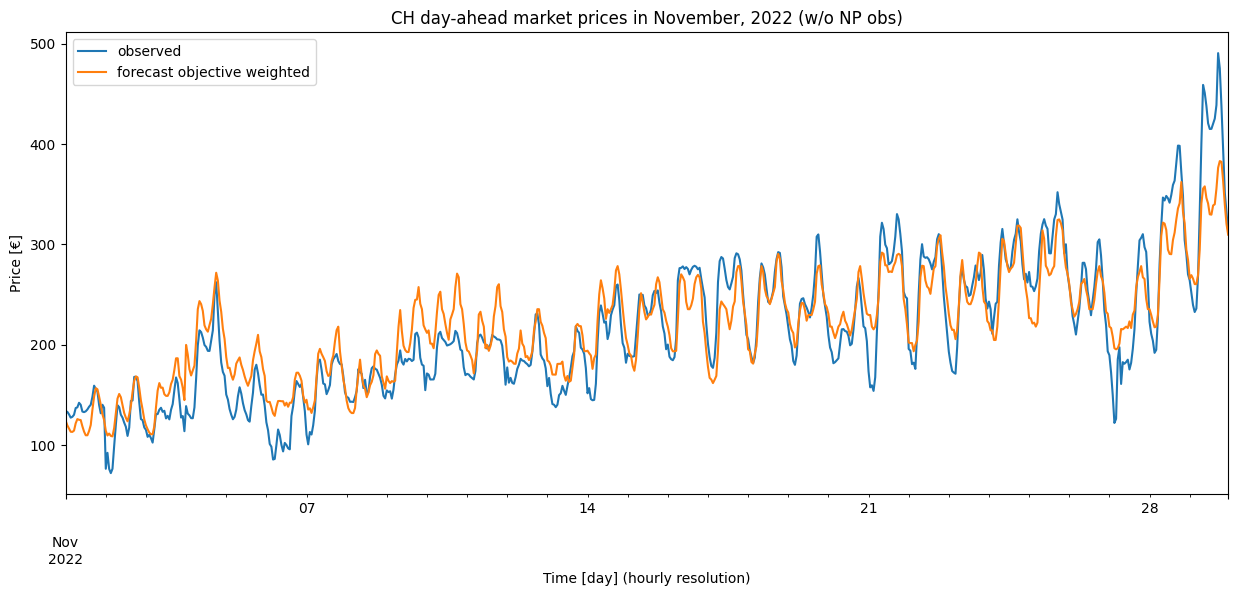

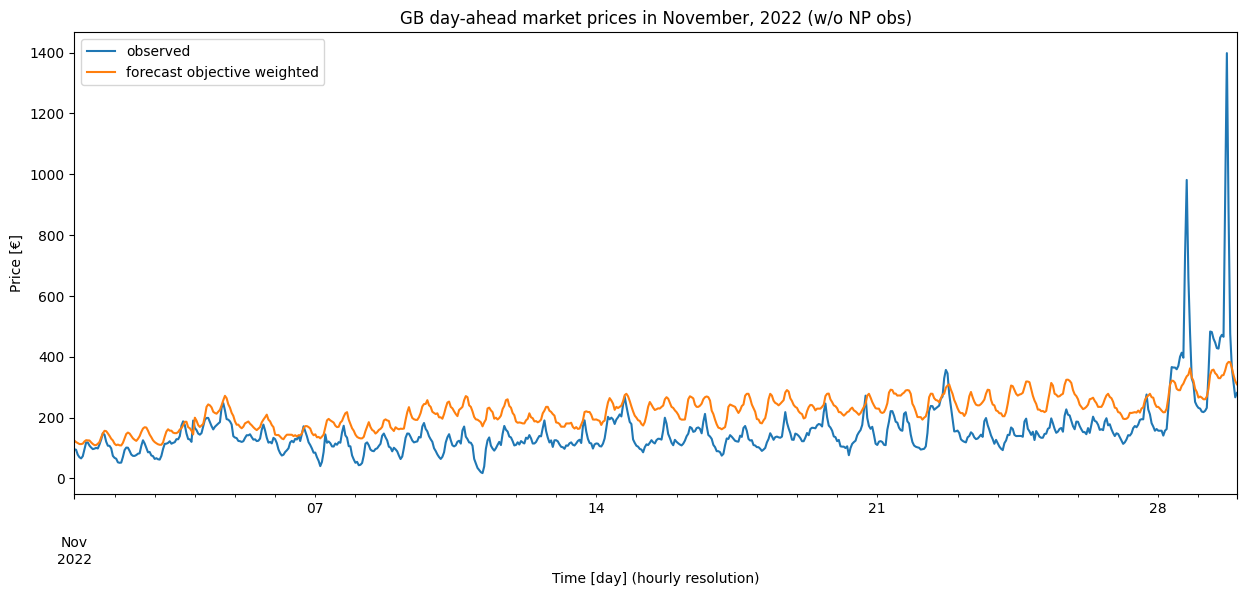

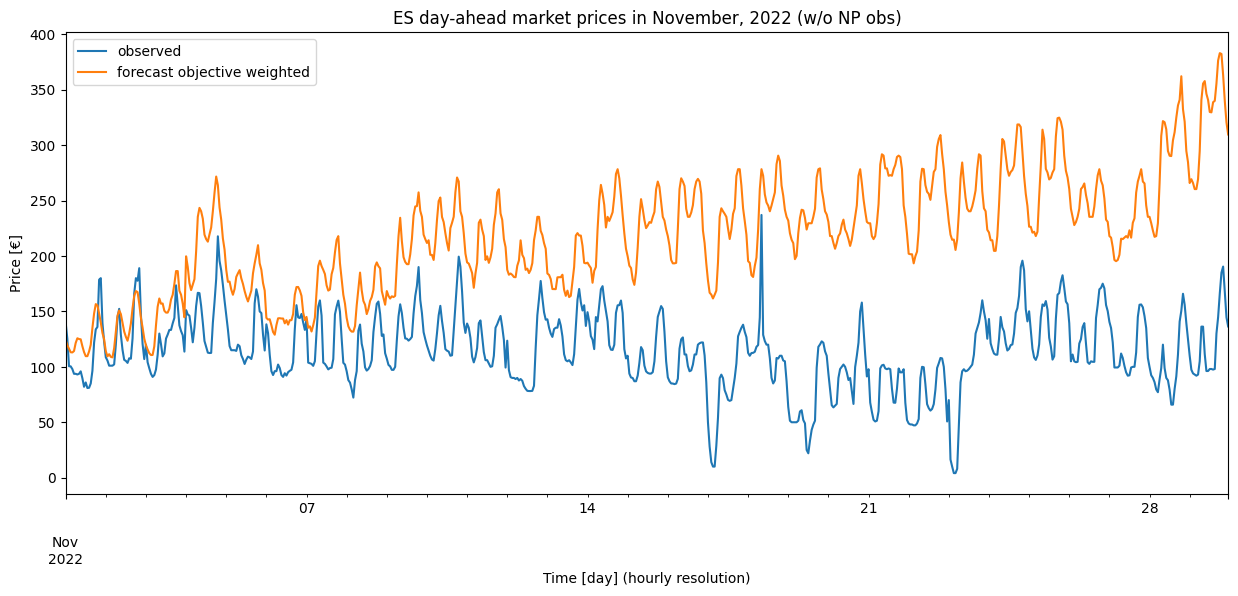

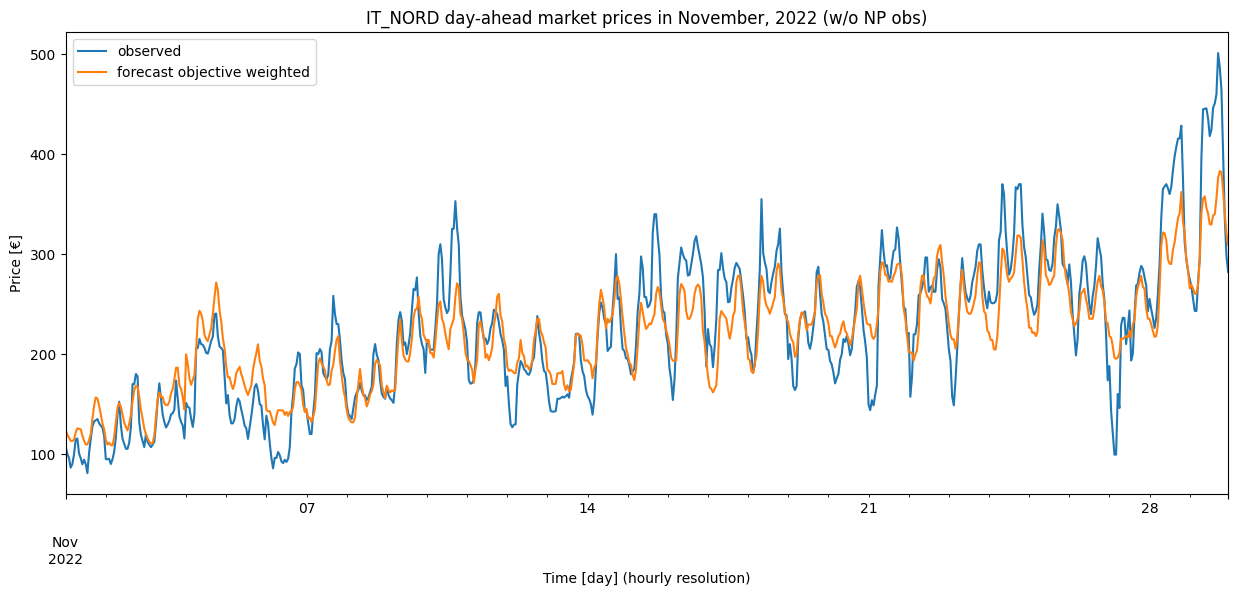

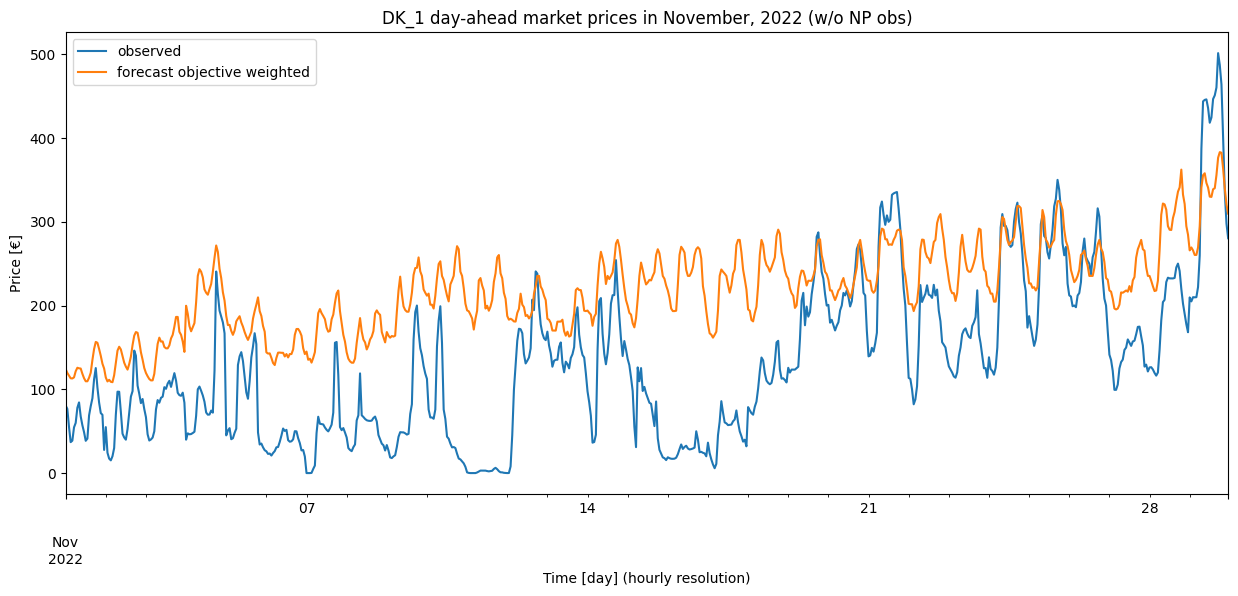

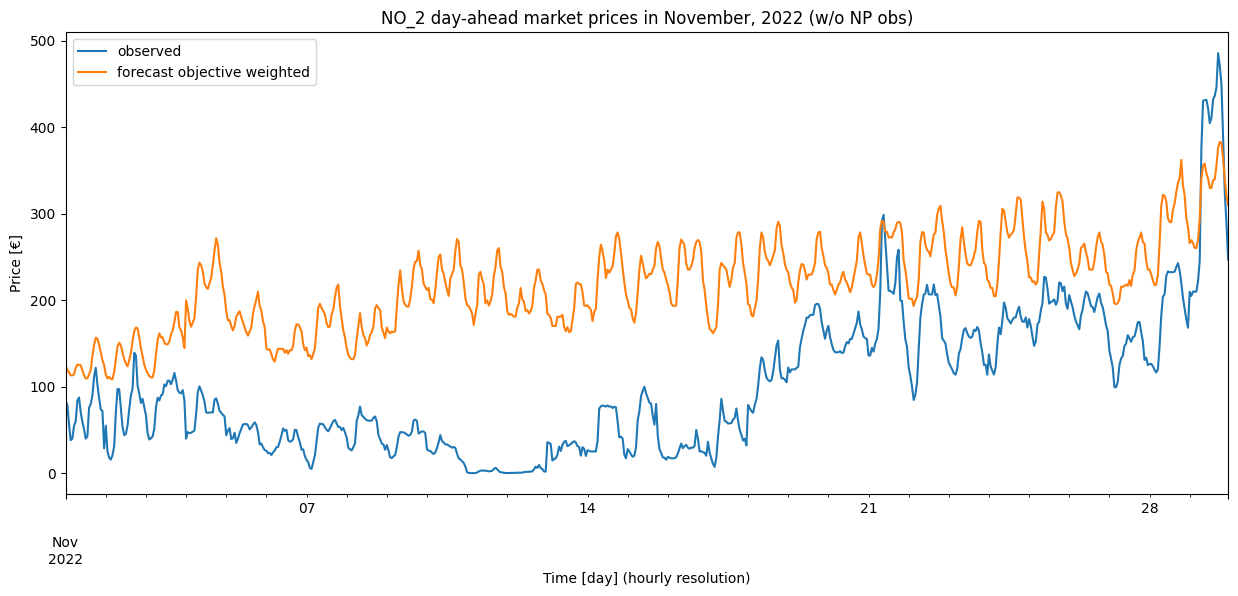

In [53]:
for zone in non_fbmc_countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_non_fbmc.iloc[0:24*29][zone].plot()
    df_forecast6.iloc[0:24*29][zone].plot(ax=ax)
    plt.title("{0} day-ahead market prices in November, 2022 (w/o NP obs)".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed', 'forecast objective weighted', 'forecast with e/i'])
    plt.show()

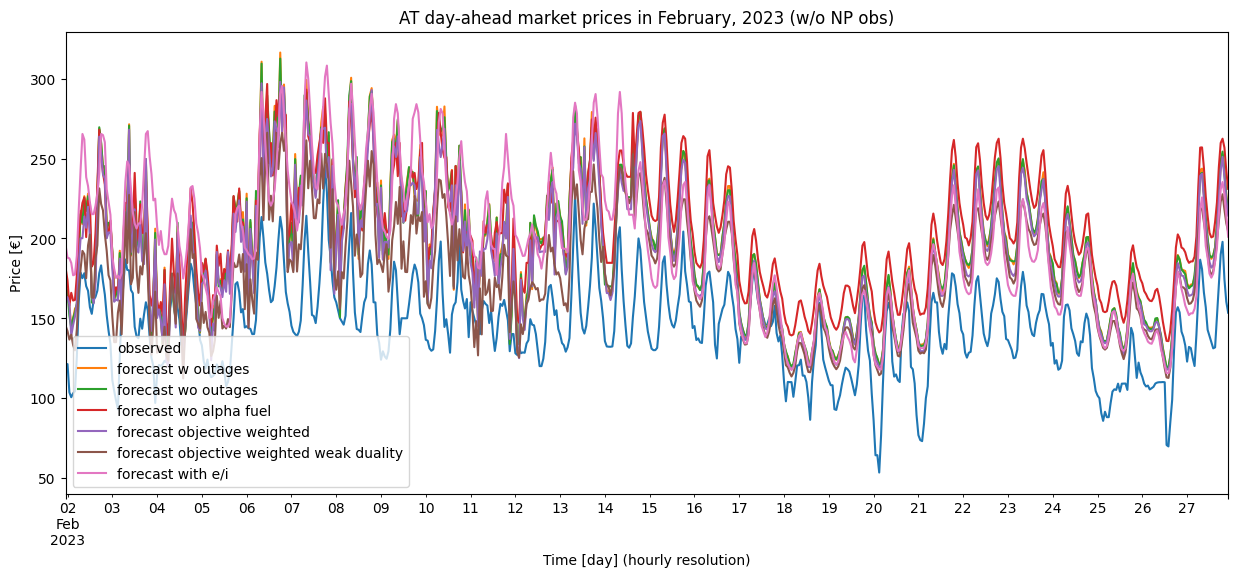

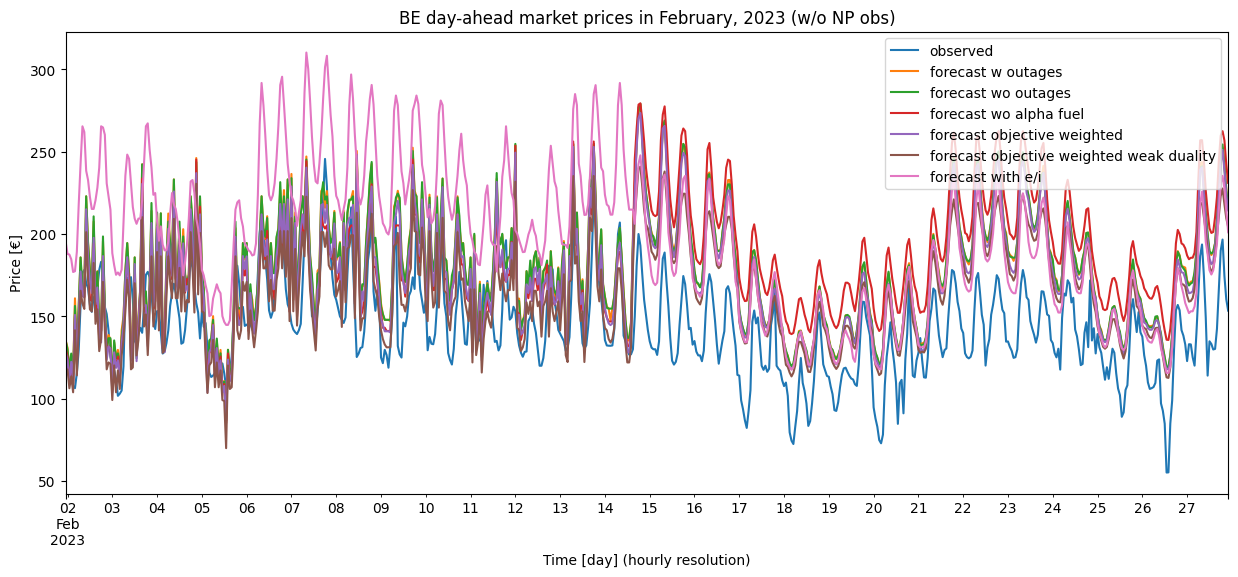

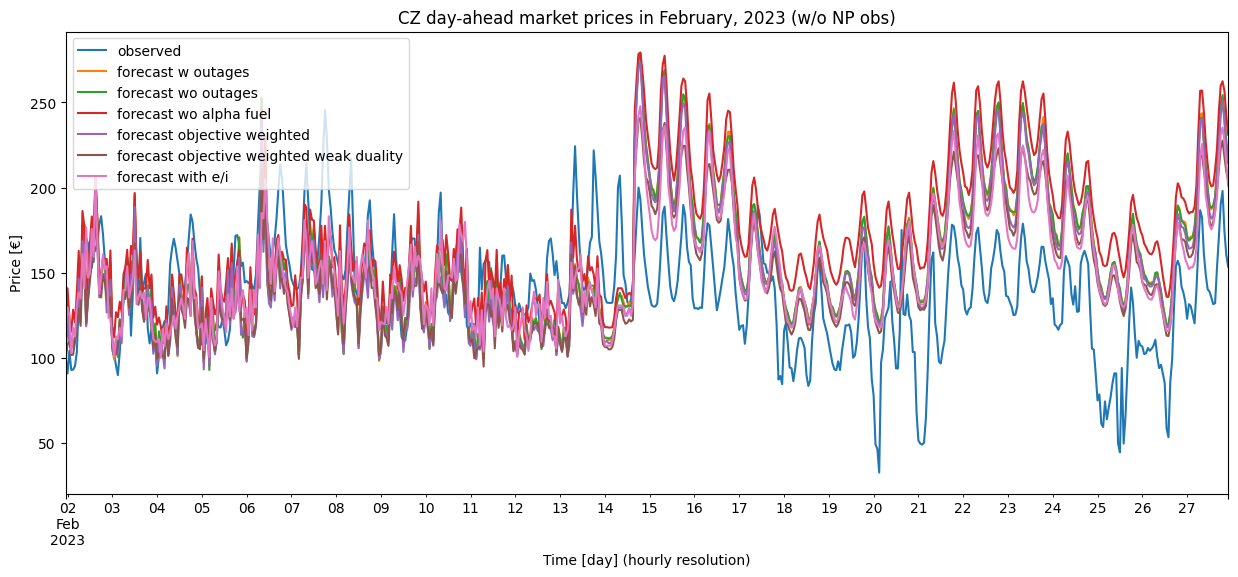

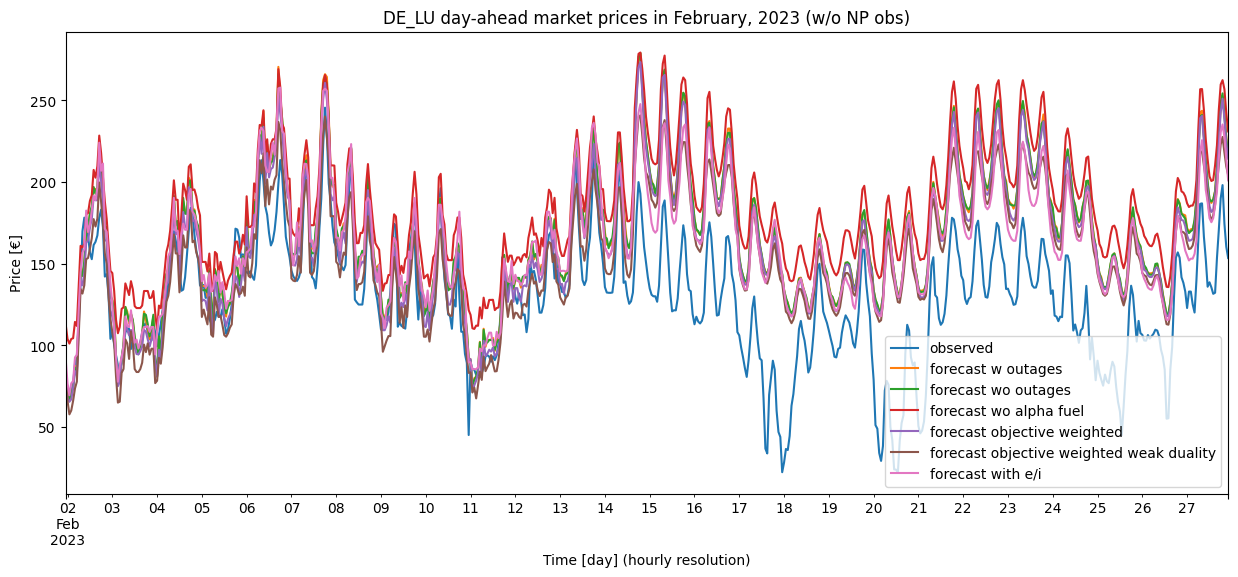

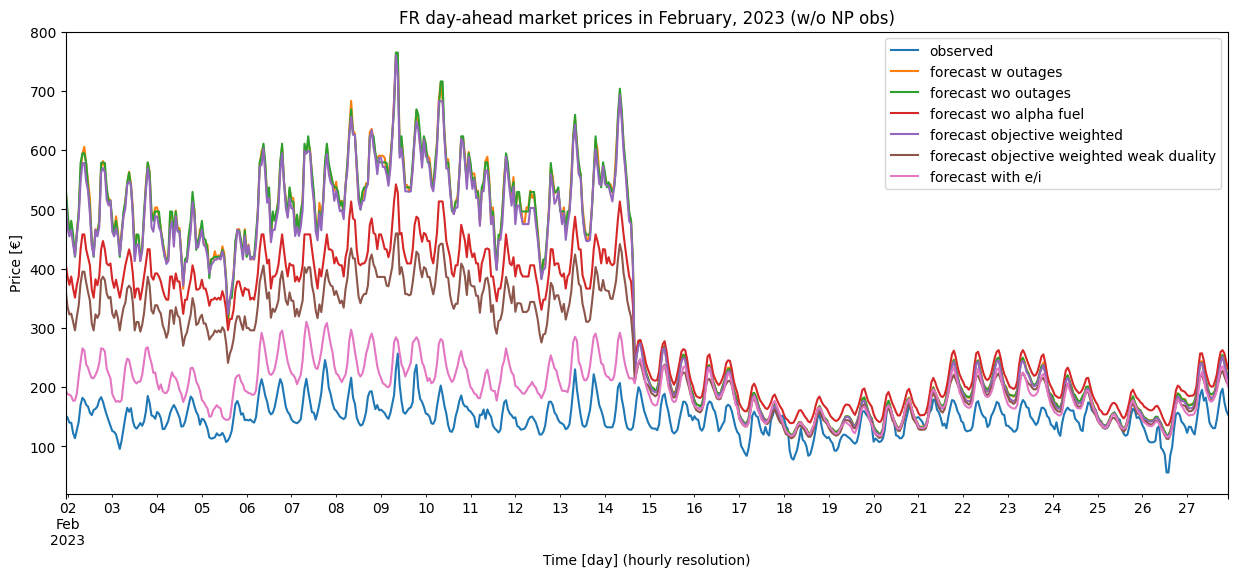

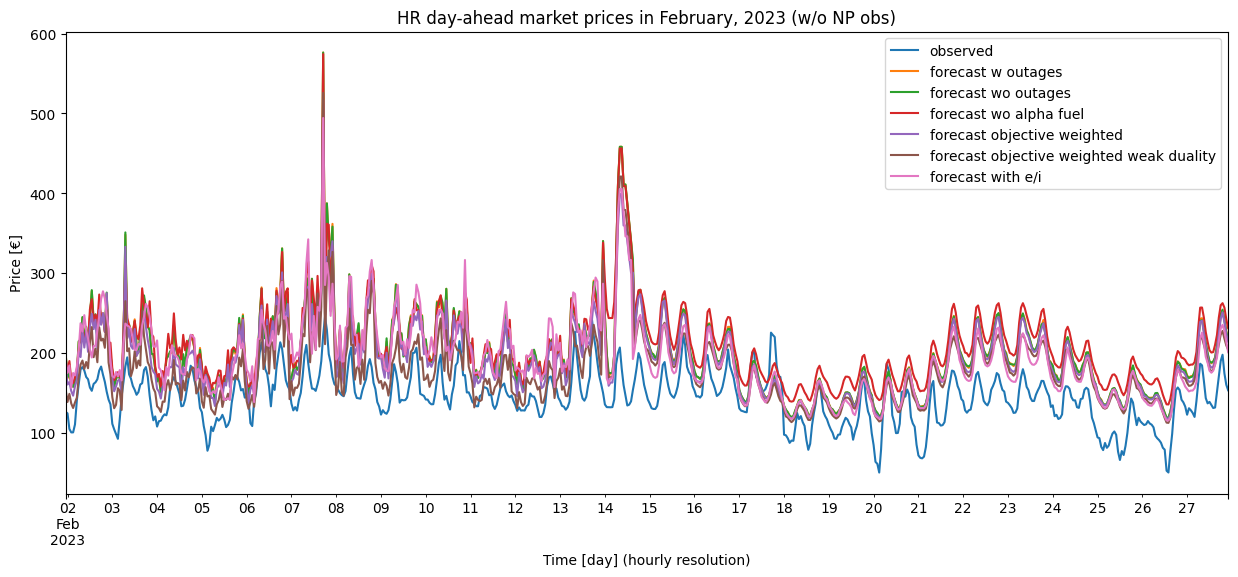

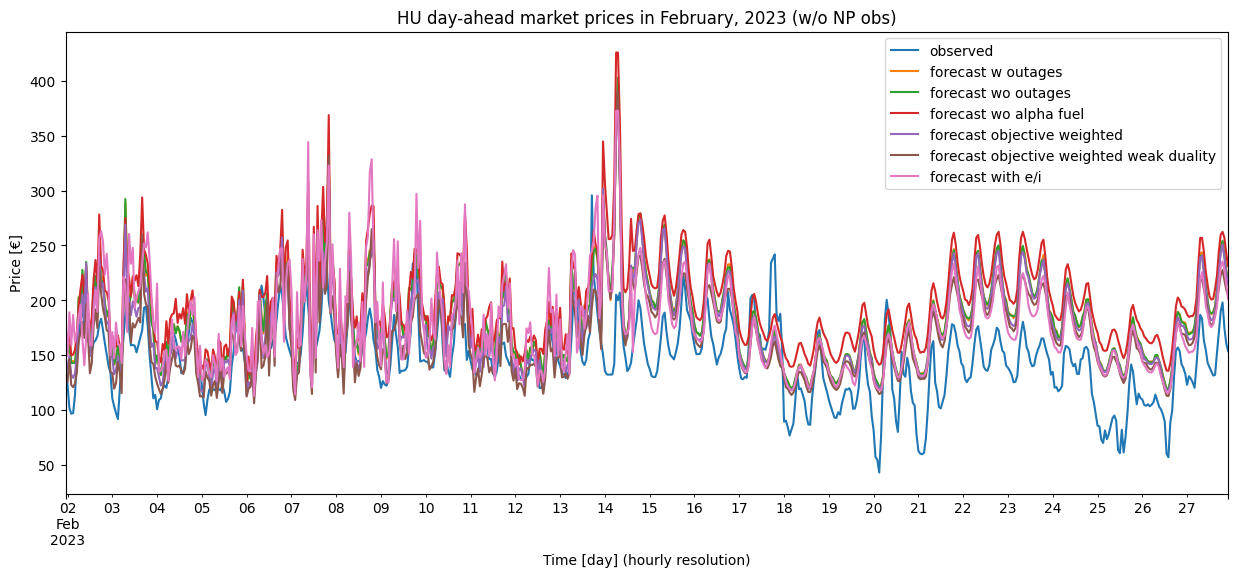

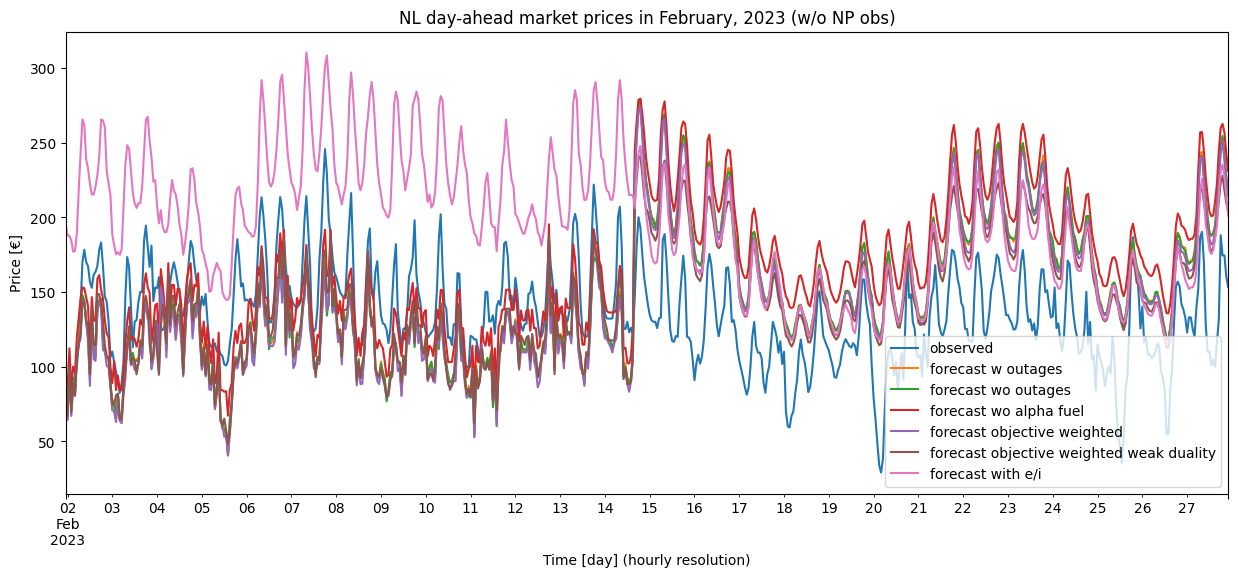

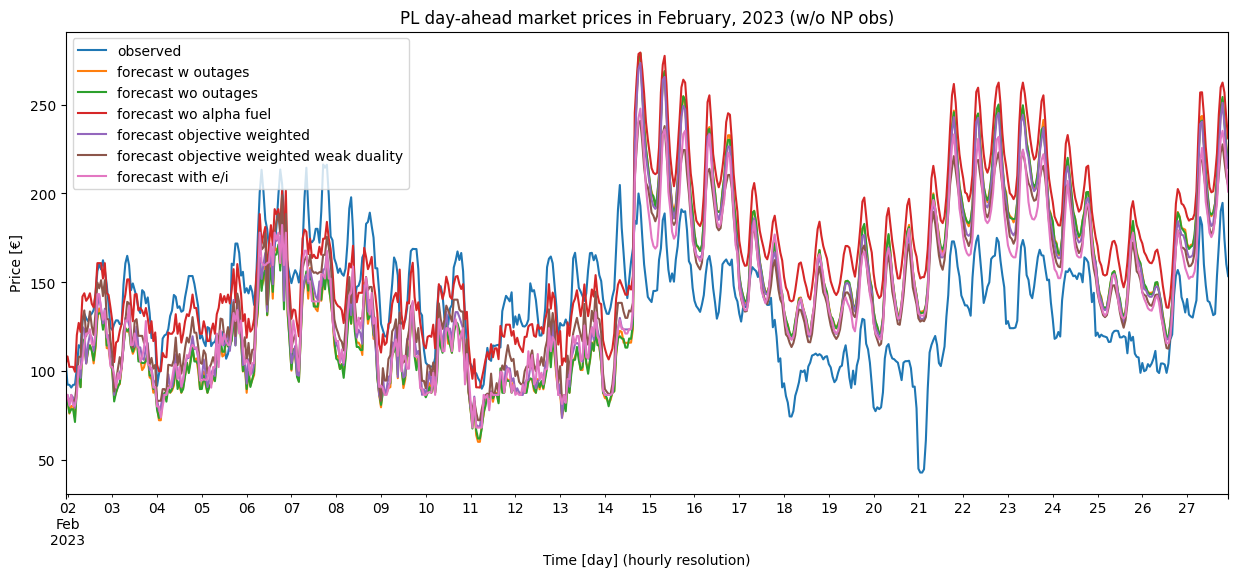

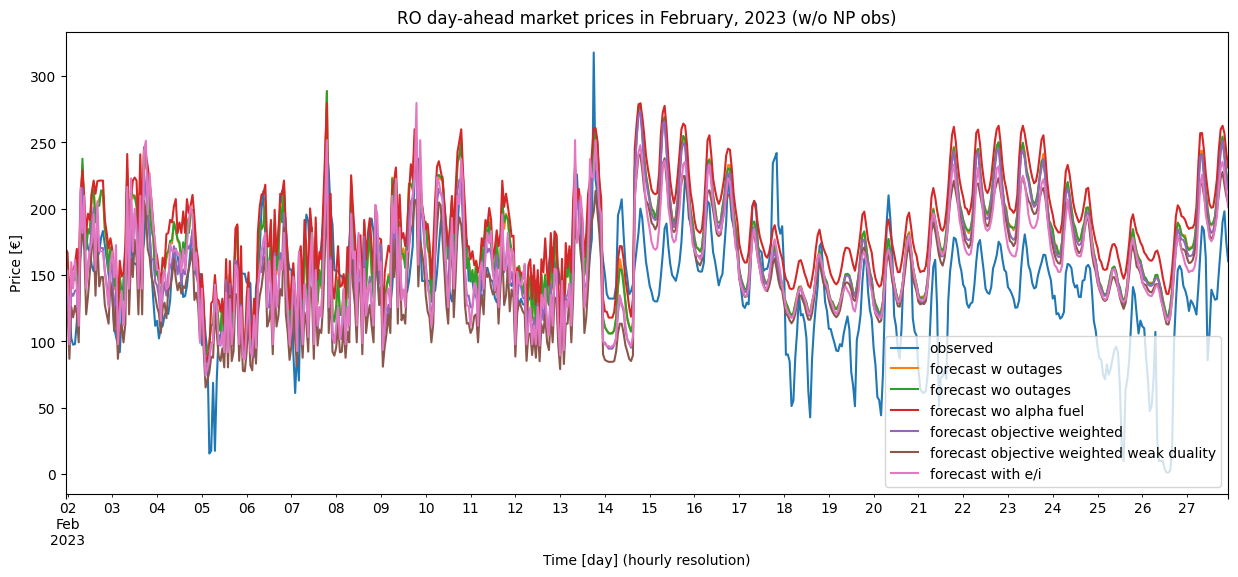

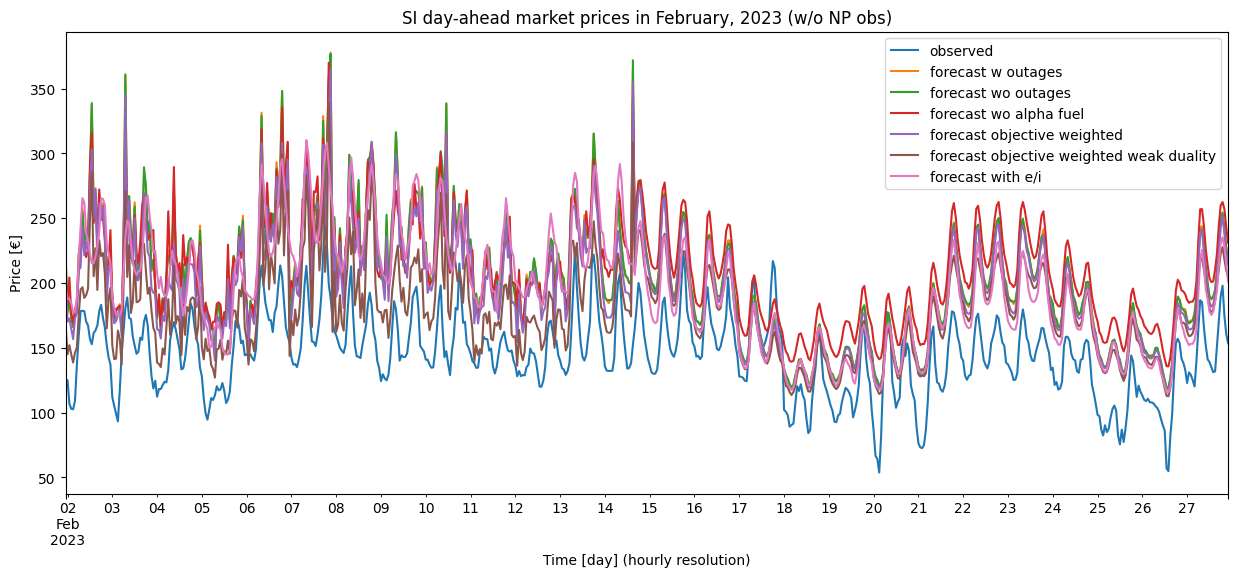

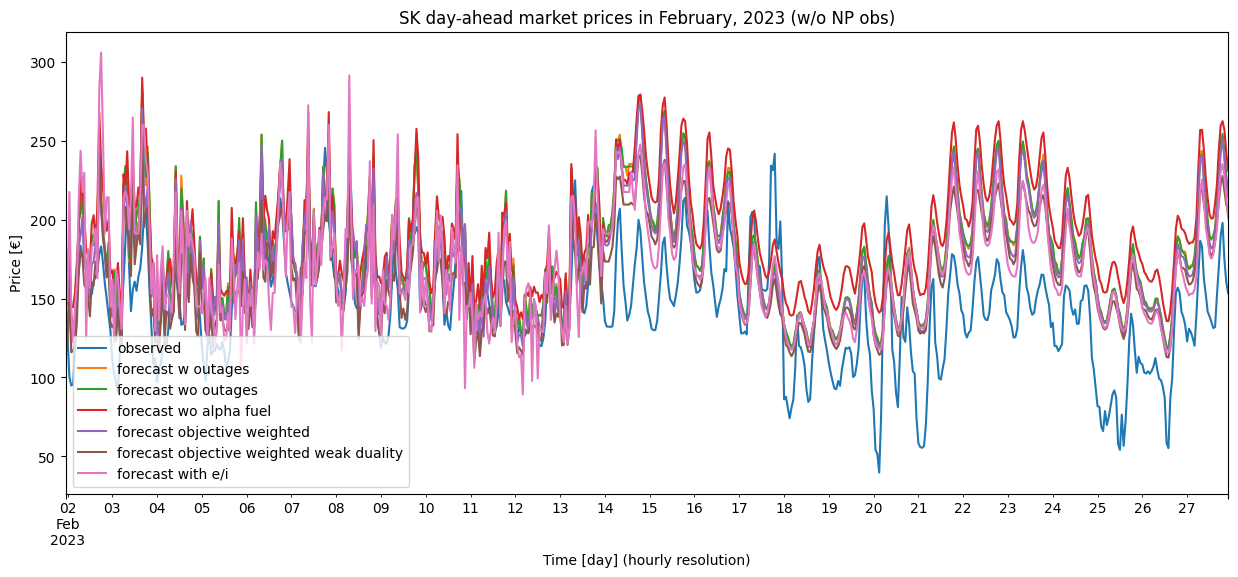

In [54]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed.iloc[24*30:24*56][zone].plot()
    df_forecast.iloc[24*30:24*56][zone].plot(ax=ax)
    df_forecast2.iloc[24*30:24*56][zone].plot(ax=ax)
    df_forecast3.iloc[24*30:24*56][zone].plot(ax=ax)
    df_forecast4.iloc[24*30:24*56][zone].plot(ax=ax)
    df_forecast5.iloc[24*30:24*56][zone].plot(ax=ax)
    df_forecast6.iloc[24*30:24*56][zone].plot(ax=ax)
    plt.title("{0} day-ahead market prices in February, 2023 (w/o NP obs)".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed', 'forecast w outages', 'forecast wo outages', 'forecast wo alpha fuel', 'forecast objective weighted', 'forecast objective weighted weak duality', 'forecast with e/i'])
    plt.show()

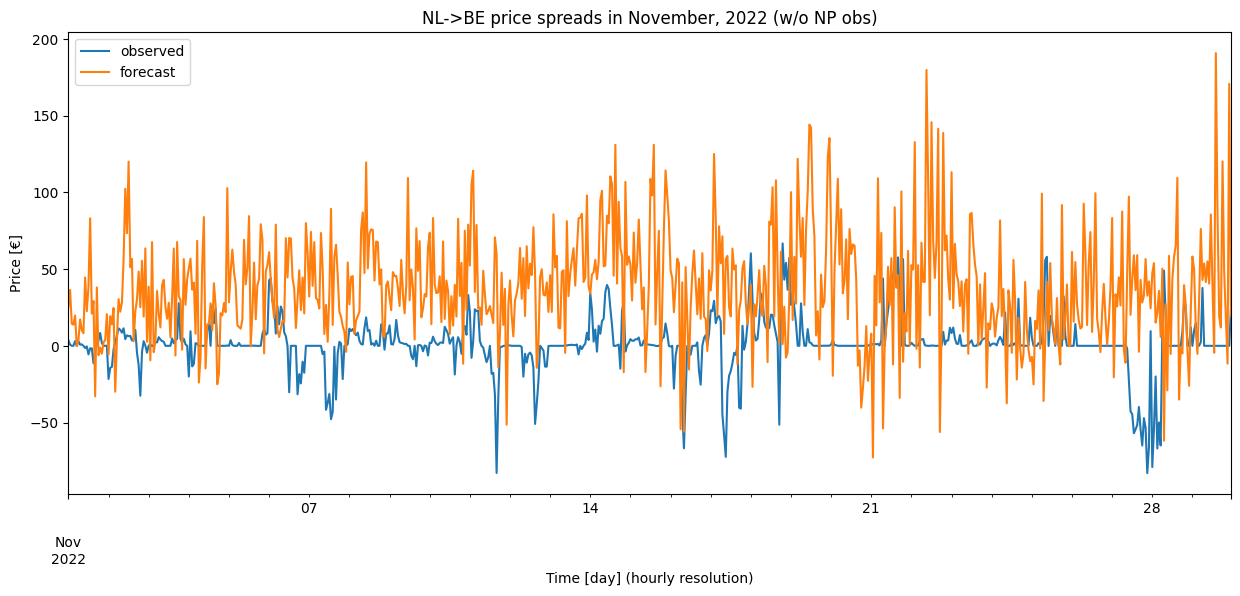

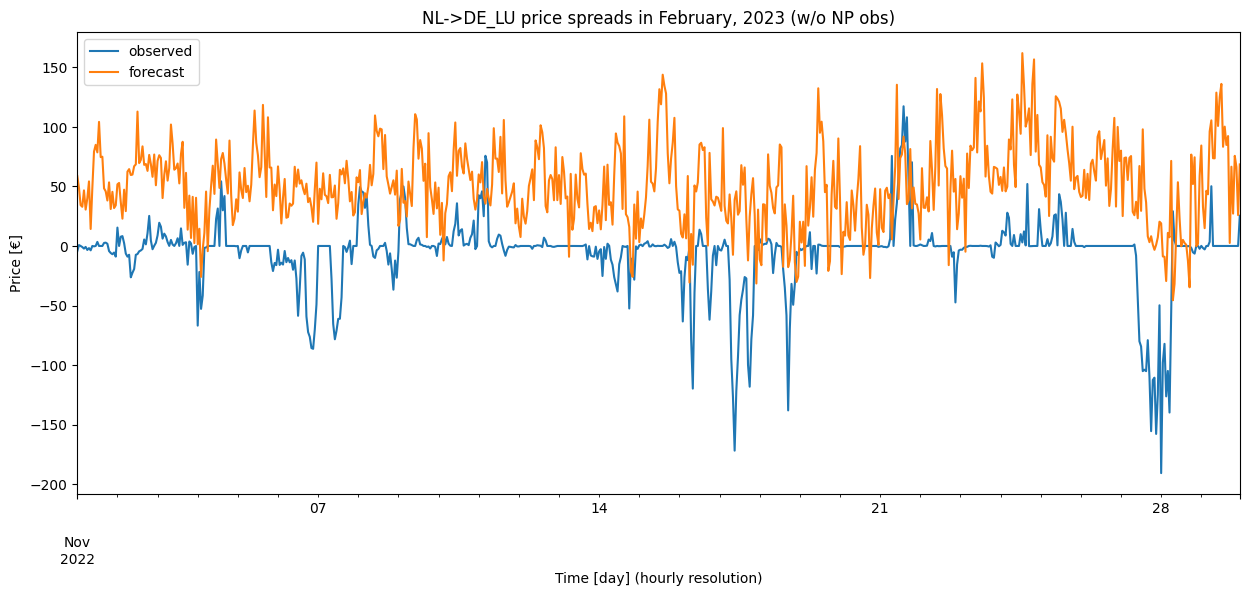

In [9]:
# price spreads

# NL-> BE
df_nl_be_observed = df_observed.iloc[0:24*29]['BE'] - df_observed.iloc[0:24*29]['NL'] 
df_nl_be_forecast = df_forecast.iloc[0:24*29]['BE'] - df_forecast.iloc[0:24*29]['NL'] 
plt.figure(figsize=(15,6))
ax = df_nl_be_observed.plot()
df_nl_be_forecast.plot(ax=ax)
plt.title("NL->BE price spreads in November, 2022 (w/o NP obs)")
plt.ylabel('Price [€]')
plt.xlabel('Time [day] (hourly resolution)')
ax.legend(['observed', 'forecast'])
plt.show()

# NL-> DE
df_nl_be_observed = df_observed.iloc[0:24*29]['DE_LU'] - df_observed.iloc[0:24*29]['NL'] 
df_nl_be_forecast = df_forecast.iloc[0:24*29]['DE_LU'] - df_forecast.iloc[0:24*29]['NL'] 
plt.figure(figsize=(15,6))
ax = df_nl_be_observed.plot()
df_nl_be_forecast.plot(ax=ax)
plt.title("NL->DE_LU price spreads in February, 2023 (w/o NP obs)")
plt.ylabel('Price [€]')
plt.xlabel('Time [day] (hourly resolution)')
ax.legend(['observed', 'forecast'])
plt.show()

In [44]:
df_errors = df_forecast.copy()
df_errors6 = df_forecast6.copy()

df_errors = df_errors - df_observed
df_errors = df_errors/df_forecast

df_errors6 = df_errors6 - df_observed
df_errors6 = df_errors6/df_forecast

Text(0.5, 0.98, 'Day-ahead market price forecast errors in November, 2022 (w/o NP obs)')

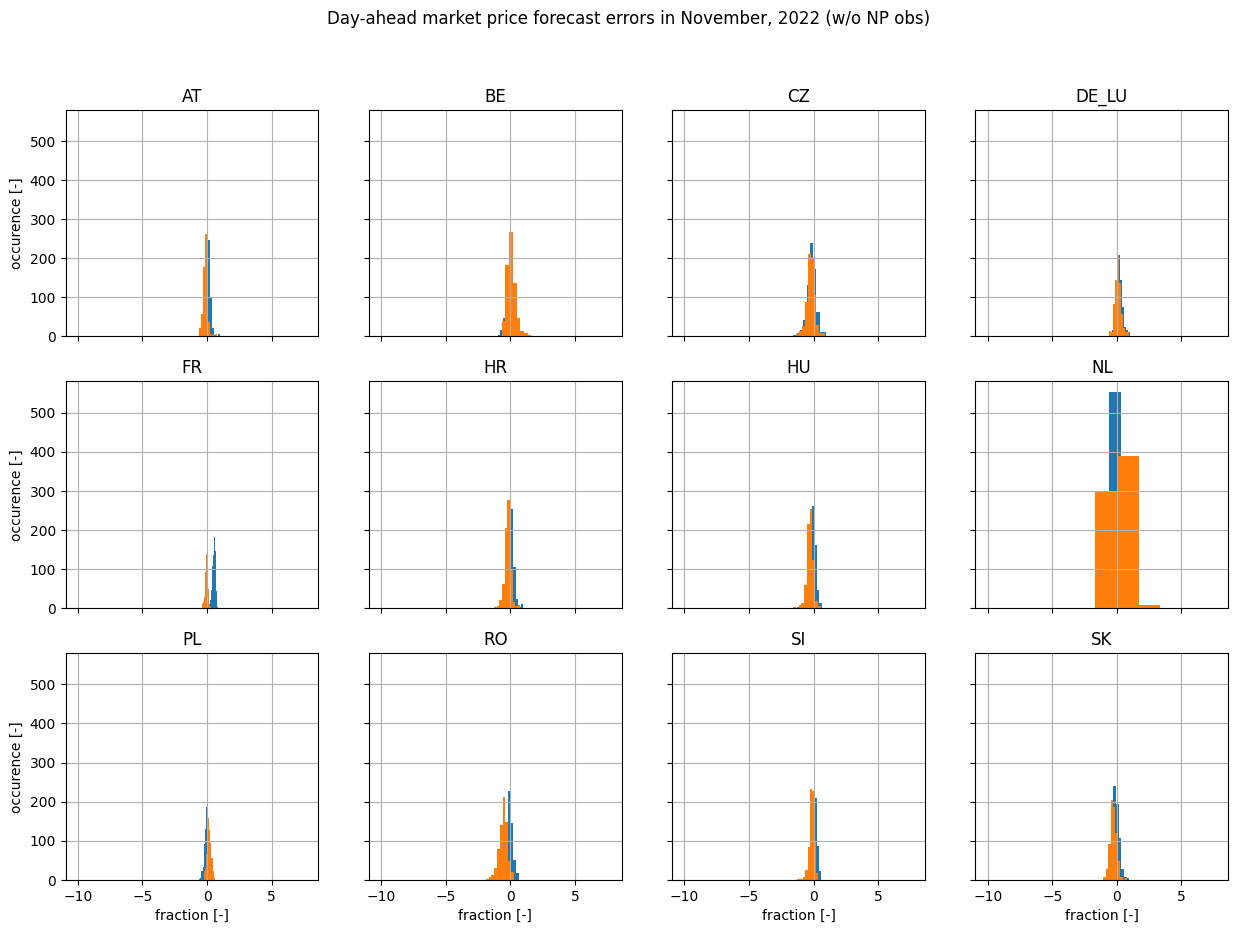

In [45]:
fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(countries):
    df_errors.iloc[0:24*29][zone].hist(ax=zone_axs[index])
    df_errors6.iloc[0:24*29][zone].hist(ax=zone_axs[index])
    zone_axs[index].set_title(zone)
   
for ax in axs.flat:
    ax.set(xlabel='fraction [-]', ylabel='occurence [-]')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Day-ahead market price forecast errors in November, 2022 (w/o NP obs)')

Text(0.5, 0.98, 'Day-ahead market price relative forecast errors in February, 2023 (w/o NP obs)')

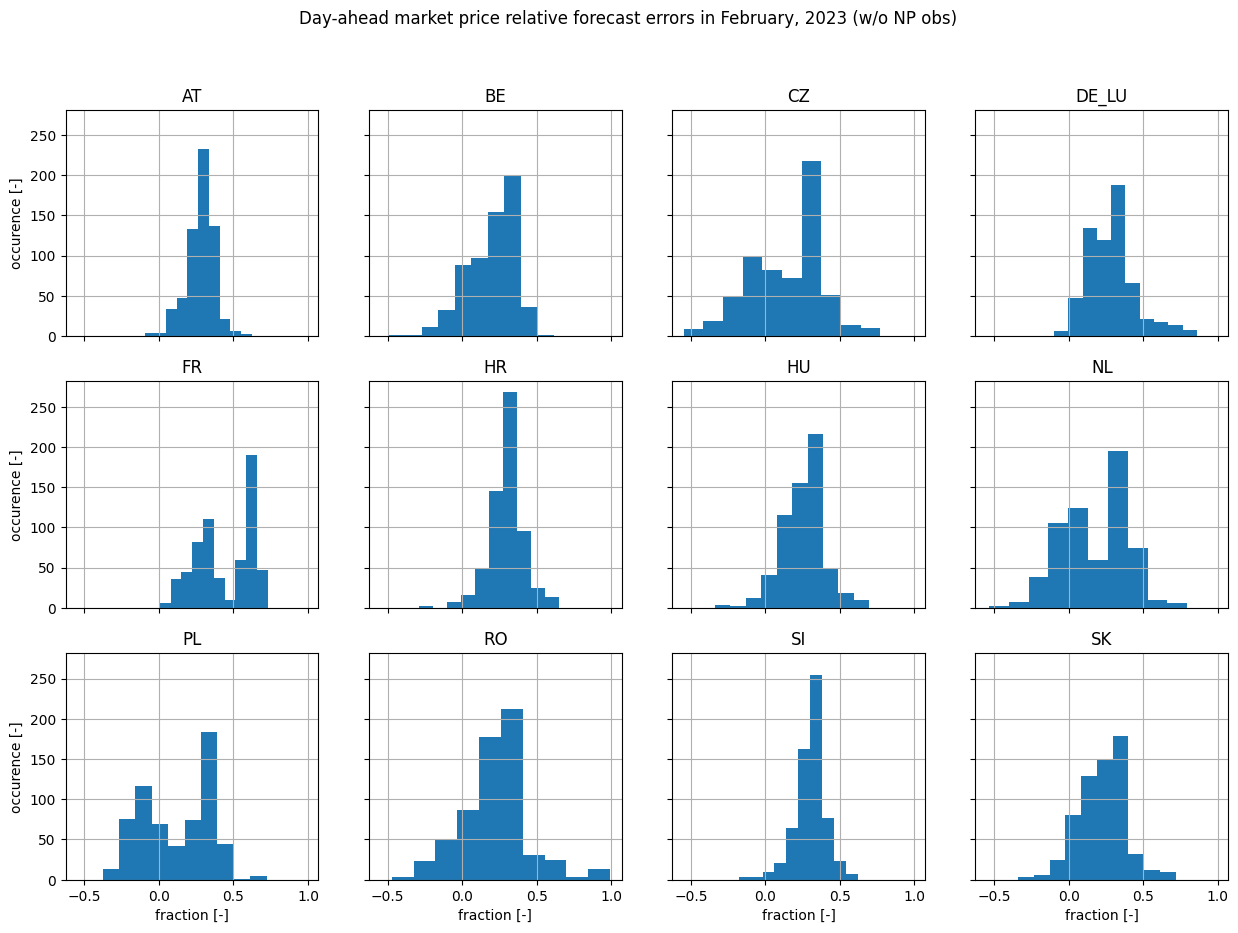

In [98]:
fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(countries):
    df_errors.iloc[24*30:24*56][zone].hist(ax=zone_axs[index])
    zone_axs[index].set_title(zone)
   
for ax in axs.flat:
    ax.set(xlabel='fraction [-]', ylabel='occurence [-]')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Day-ahead market price relative forecast errors in February, 2023 (w/o NP obs)')